## Import libraries

In [6]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

## Data load

In [21]:
digits = load_digits()
print(digits["data"][0])
print(digits["data"][0].shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(64,)


In [31]:
image = np.reshape(digits.data[10], (8,8))
image

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

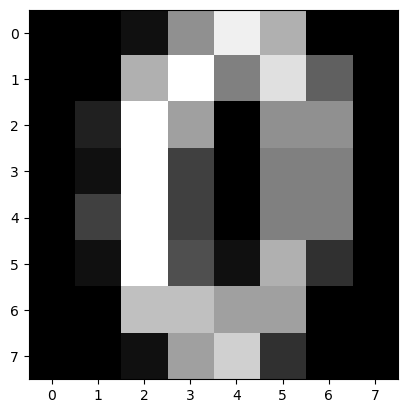

In [32]:
plt.imshow(image, cmap="gray")
plt.show()

In [33]:
digits.target[10]

0

### `Data split:` _train_ and _test_.

In [36]:
digits.data, digits.target

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [39]:
from sklearn.model_selection import train_test_split

# Data split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [41]:
X_train.shape

(1437, 64)

In [42]:
y_train.shape

(1437,)

In [43]:
X_test.shape

(360, 64)

In [44]:
y_test.shape

(360,)

## Model training

In [63]:
logistic_reg = LogisticRegression(max_iter=10000)

In [64]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Evaluating the model

In [65]:
predictions = logistic_reg.predict(X_test)

In [66]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 8, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
cm = confusion_matrix(y_test, predictions) # It receives a test sample of our real values and its prediction set
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]])

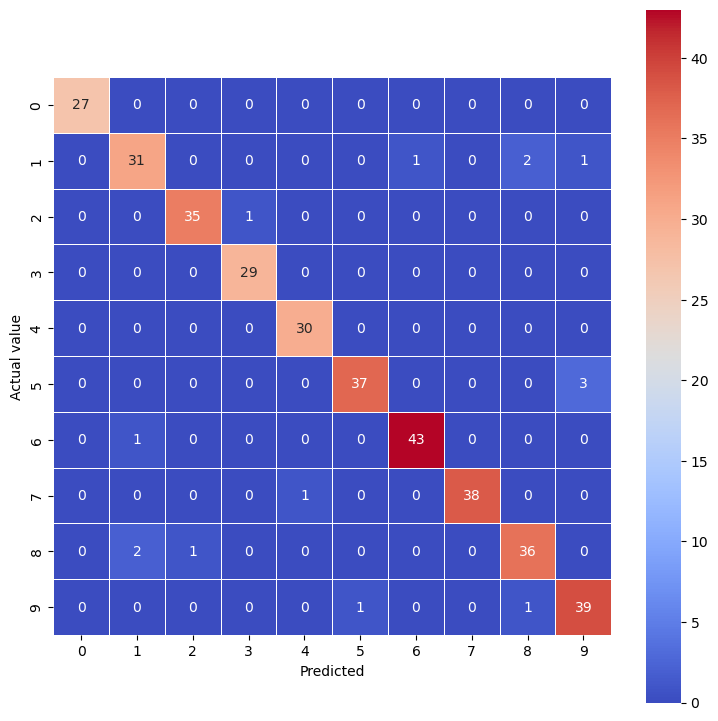

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=True, cmap="coolwarm", annot=True, linewidths=0.5, square=True)
plt.ylabel("Actual value")
plt.xlabel("Predicted")
plt.show()

# When to use Logistic Regression?
### Advantages:

* Use to implement
* Interpretation metrics as linear regression
* Feature relevance inference
* Percent classification (binary: 0,1)
* Excellent results with linearly behaviored datasets.

### Disadvantages:

* It assumes linearity between codependent variables
* Overfitting in high dimensionality datasets
* Multicolinearity affects
* Better results with large datasets.

### When to use it?

* Simple and fast
* Occurence probability about a categorical event
* Large datasets
* Linearly separated
* Balanced (about 50-50 binary) datasets.

Logistic regression is governed by functions range between 0 and 1, $Range \ f(x) = [0,1]$, one of the most popular used is `sigmoidal function`, expressed as:

$$
f(x) = \frac{1}{1+e^{-x}}
$$

where z is 

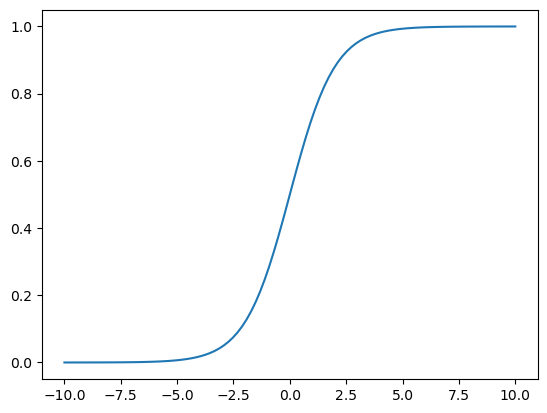

In [74]:
x = np.linspace(-10, 10, 100)
y = 1 / (1+np.exp(-x))

plt.plot(x, y)
plt.show()